In [47]:
""" import os
# depend on where you save the data
os.chdir('./data')
os.getcwd() """

" import os\n# depend on where you save the data\nos.chdir('./data')\nos.getcwd() "

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## Load data

In [49]:
orig_df1 = pd.read_csv("worldbank_gender_2021.csv")
orig_df1.tail(10)

,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,Merchandise imports (current US$),Merchandise trade (% of GDP),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)",Gender Ratio Class
206,Uruguay,2021,NaN,80.39,7.94,11.60,5499.4,91.17,211.12,100.47,...,1.032000e+10,32.68,1.15,0.60,NaN,NaN,NaN,NaN,NaN,4.0
207,Uzbekistan,2021,14.52,58.30,24.62,9.11,4734.3,102.59,296.84,109.70,...,2.388600e+10,54.57,2.82,2.67,NaN,NaN,NaN,NaN,NaN,3.0
208,Vanuatu,2021,NaN,15.34,NaN,1.64,609.3,84.58,0.01,84.08,...,3.390000e+08,41.35,1.44,1.38,NaN,NaN,NaN,NaN,NaN,4.0
209,"Venezuela, RB",2021,NaN,24.38,NaN,2.95,3505.1,97.18,50.89,88.64,...,7.745000e+09,NaN,1.76,0.74,NaN,NaN,NaN,NaN,NaN,2.0
210,Viet Nam,2021,NaN,39.43,12.60,21.65,5947.1,109.24,427.59,112.81,...,3.320000e+11,182.40,18.52,9.04,NaN,NaN,NaN,NaN,NaN,1.0
211,Virgin Islands (U.S.),2021,NaN,9.43,NaN,2.57,NaN,NaN,NaN,NaN,...,NaN,NaN,0.34,0.21,NaN,NaN,NaN,NaN,NaN,5.0
212,West Bank and Gaza,2021,NaN,64.93,6.32,6.95,2251.9,117.31,371.97,117.39,...,NaN,NaN,8.55,3.44,NaN,NaN,NaN,NaN,NaN,5.0
213,"Yemen, Rep.",2021,NaN,44.42,NaN,2.19,1524.8,124.71,10.63,120.77,...,5.054000e+09,29.68,37.64,9.04,NaN,NaN,NaN,NaN,NaN,1.0
214,Zambia,2021,NaN,32.07,3.00,5.11,2525.0,136.31,63.90,127.49,...,6.435000e+09,74.84,4.87,2.36,NaN,NaN,NaN,NaN,NaN,5.0
215,Zimbabwe,2021,NaN,41.88,8.85,10.34,1545.3,129.97,25.98,120.52,...,7.577000e+09,47.98,0.12,0.11,NaN,NaN,NaN,NaN,NaN,5.0


In [50]:
orig_df2 = pd.read_excel("countries_regions.xlsx")
orig_df2.tail(10)

,CountryName,Region,ThirdWorld
207,Uruguay,South America,No
208,Uzbekistan,Western Asia,No
209,Vanuatu,Australia and Oceanea,Yes
210,"Venezuela, RB",South America,No
211,Vietnam,Southeast Asia,No
212,Virgin Islands (U.S.),North America,No
213,West Bank and Gaza,Middle East,No
214,"Yemen, Rep.",Middle East,Yes
215,Zambia,Africa,Yes
216,Zimbabwe,Africa,No


In [51]:
print(orig_df1.shape,orig_df2.shape)

(216, 196) (217, 3)


## Combine Table

In [52]:
missing_countries = orig_df2.loc[
    ~orig_df2['CountryName'].isin(orig_df1['Country Name']),
    'CountryName'
]
missing_countries



37     Central African Republic
206    United States of America
211                     Vietnam
Name: CountryName, dtype: object

In [53]:
name_map = {
    'United States': 'United States of America',
    'Viet Nam': 'Vietnam',

}

orig_df1['Country Name'] = orig_df1['Country Name'].replace(name_map)

In [54]:
missing_countries = orig_df2.loc[
    ~orig_df2['CountryName'].isin(orig_df1['Country Name']),
    'CountryName'
]
missing_countries

37    Central African Republic
Name: CountryName, dtype: object

In [55]:
combined_df = orig_df1.merge(
    orig_df2,
    left_on='Country Name',
    right_on='CountryName',
    how='inner'   
)


In [56]:
combined_df = combined_df.drop(columns=['CountryName'])

In [57]:
combined_df.head(10)

,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)",Gender Ratio Class,Region,ThirdWorld
0,Afghanistan,2021,6.51,58.74,33.60,12.00,2099.0,125.67,5.20,114.32,...,60.87,12.79,NaN,NaN,NaN,NaN,NaN,1.0,South Asia,Yes
1,Albania,2021,16.54,41.47,18.36,21.89,5144.7,114.68,NaN,104.92,...,27.58,15.96,NaN,NaN,NaN,NaN,NaN,1.0,Eastern Europe,No
2,Algeria,2021,NaN,17.35,11.23,3.16,1433.7,108.76,20.68,104.83,...,2.10,1.61,NaN,NaN,NaN,NaN,NaN,1.0,Africa,No
3,American Samoa,2021,NaN,14.50,NaN,4.85,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia and Oceanea,No
4,Andorra,2021,NaN,39.91,0.53,1.59,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe,No
5,Angola,2021,NaN,36.81,11.49,4.31,1000.1,116.22,5.61,117.50,...,5.59,3.34,NaN,NaN,NaN,NaN,NaN,5.0,Africa,Yes
6,Antigua and Barbuda,2021,NaN,20.45,2.08,9.09,2094.1,81.79,8.33,80.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,No
7,Argentina,2021,NaN,43.10,7.31,15.42,5193.0,107.19,62.18,108.40,...,0.85,0.31,NaN,NaN,NaN,NaN,NaN,4.0,South America,No
8,Armenia,2021,9.31,58.83,11.34,15.57,1287.2,71.89,203.73,84.82,...,0.04,0.18,NaN,NaN,NaN,NaN,NaN,5.0,Western Asia,No
9,Aruba,2021,NaN,11.11,NaN,11.11,NaN,NaN,3.86,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,No


In [58]:
combined_df.shape

(216, 198)

## Handling Missing Value

<Axes: >

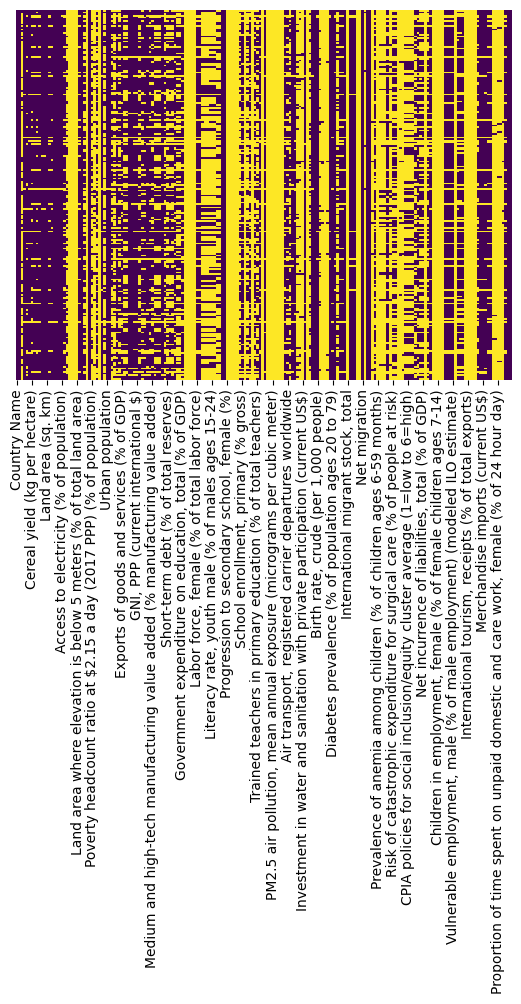

In [59]:
sns.heatmap(combined_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [60]:
missing_pct = (combined_df.isnull().mean() * 100)
missing_pct[missing_pct > 50].sort_values(ascending=False)


Electric power consumption (kWh per capita)                                             100.000000
Ease of doing business rank (1=most business-friendly regulations)                      100.000000
Land area where elevation is below 5 meters (% of total land area)                      100.000000
Energy use (kg of oil equivalent per capita)                                            100.000000
Population living in areas where elevation is below 5 meters (% of total population)    100.000000
                                                                                           ...    
Short-term debt (% of total reserves)                                                    54.629630
Container port traffic (TEU: 20 foot equivalent units)                                   51.851852
Intentional homicides (per 100,000 people)                                               51.851852
Children out of school, primary, male                                                    50.925926
Children o

In [61]:
th = len(combined_df)*0.5
combined_df.dropna(thresh=th, axis=1,inplace=True)

In [62]:
combined_df.shape

(216, 106)

<Axes: >

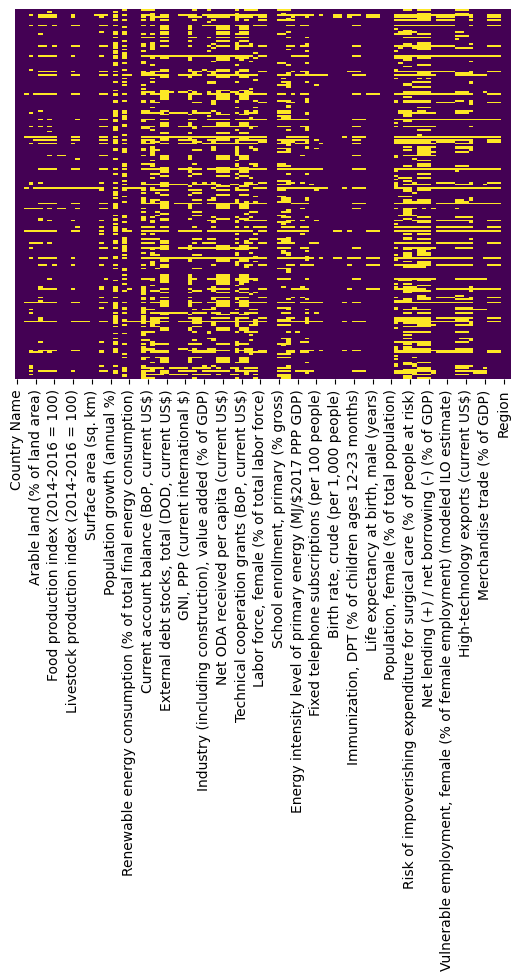

In [63]:
sns.heatmap(combined_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [65]:
num_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()


cat_cols = combined_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")
print(f"\nCategorical columns: {cat_cols}")



Numerical columns: 103
Categorical columns: 3

Categorical columns: ['Country Name', 'Region', 'ThirdWorld']


In [66]:
num_cols_with_missing = [col for col in num_cols if combined_df[col].isnull().sum() > 0]
print(f"\nNumerical columns with missing values: {len(num_cols_with_missing)}")

for col in num_cols_with_missing:
    median_val = combined_df[col].median()
    combined_df[col] = combined_df[col].fillna(median_val)


print(f"\nNumerical missing values remaining: {combined_df[num_cols].isnull().sum().sum()}")


Numerical columns with missing values: 94

Numerical missing values remaining: 0


In [68]:
cat_cols_with_missing = [col for col in cat_cols if combined_df[col].isnull().sum() > 0]
print(f"\nCategorical columns with missing values: {len(cat_cols_with_missing)}")


Categorical columns with missing values: 0


<Axes: >

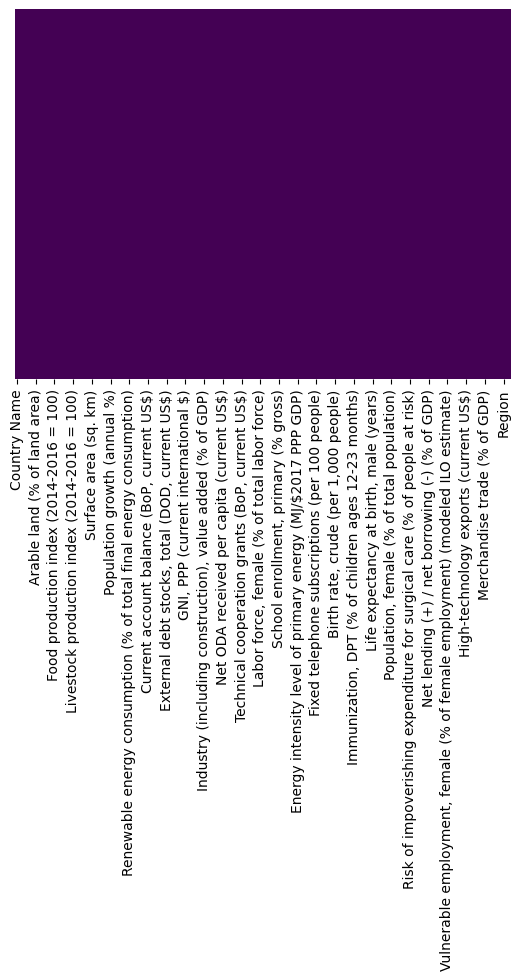

In [69]:
sns.heatmap(combined_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [71]:
missing_pct = (combined_df.isnull().mean() * 100).sort_values(ascending=False)
missing_pct


Country Name                                                                           0.0
Year                                                                                   0.0
Agricultural land (% of land area)                                                     0.0
Agriculture, forestry, and fishing, value added (% of GDP)                             0.0
Arable land (% of land area)                                                           0.0
                                                                                      ... 
Contributing family workers, female (% of female employment) (modeled ILO estimate)    0.0
Contributing family workers, male (% of male employment) (modeled ILO estimate)        0.0
Gender Ratio Class                                                                     0.0
Region                                                                                 0.0
ThirdWorld                                                                             0.0

In [ ]:
df